![seaborn](https://drive.google.com/uc?id=1j1ZM-tMaWYNCa_YkMGFIfymcrLS0MWG3)

### 이번 실습에서는 다음 내용들을 배웁니다.


- 원하는 조건에 맞는 그래프를 seaborn을 이용하여 그리는 방법에 대해 배웁니다.


- 각 그래프별 특징을 파악하고 사용법에 대해 익힙니다.

## Seaborn이란?


- matplotlib을 기본으로 다양한 시각화 기법을 제공하는 라이브러리.


- 엄청나게 화려한 시각화 기법들을 제공하며, 기본적으로 이쁩니다.
>  histplot, kdeplot, jointplot, Facetgrid, ...


- pandas DataFrame과 매우 호환이 잘 됩니다.

  >  e.g. sns.xxxplot(data=df)    **<--- 기본세팅!**

### 2. 경향성 표현하기

In [9]:
# 라이브러리와 데이터를 불러오고, 시각화를 위한 세팅을 합니다.
import seaborn as sns
import pandas as pd
sns.set_theme(style='whitegrid')
penguins = sns.load_dataset("penguins").dropna()
penguins[['species', 'island', 'body_mass_g']]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [17]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
pd.pivot_table(data=penguins,
               index=['sex', 'island'],
               values='body_mass_g',
               aggfunc=['count', 'sum', 'mean'])

count         sum         mean
                 body_mass_g body_mass_g  body_mass_g
sex    island                                        
Female Biscoe             80    345550.0  4319.375000
       Dream              61    210225.0  3446.311475
       Torgersen          24     81500.0  3395.833333
Male   Biscoe             83    423675.0  5104.518072
       Dream              62    247200.0  3987.096774
       Torgersen          23     92800.0  4034.782609

### Lineplot

- 특정 데이터를 x, y로 표시하여 관계를 확인할 수 있는 plot. (선 그래프)


- 수치형 지표들 간의 경향을 파악할 때 많이 사용합니다.

<Axes: xlabel='age', ylabel='fare'>

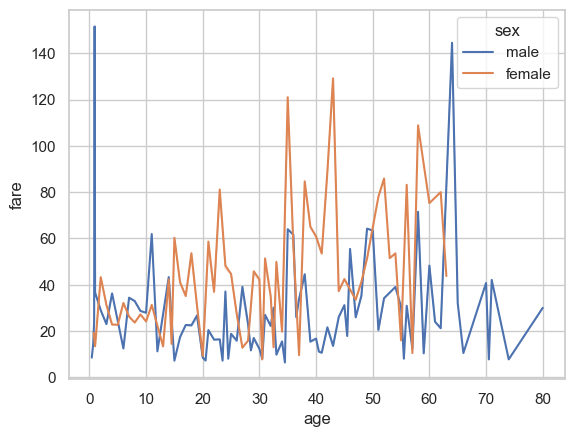

In [20]:
# penguin 데이터에 lineplot을 출력합니다.
sns.lineplot(data=titanic, x="age",
             y="fare",
             hue="sex",
             errorbar=('ci', False))

### Pointplot

- 특정 수치 데이터를 error bar와 함께 출력해주는 plot.



- 수치 데이터를 다양한 각도에서 한 번에 바라보고 싶을 때 사용합니다.


- 데이터와 error bar를 한 번에 찍어주기 때문에, 살펴보고 싶은 특정 지표들만 사용하는 것이 좋습니다.

<Axes: xlabel='species', ylabel='body_mass_g'>

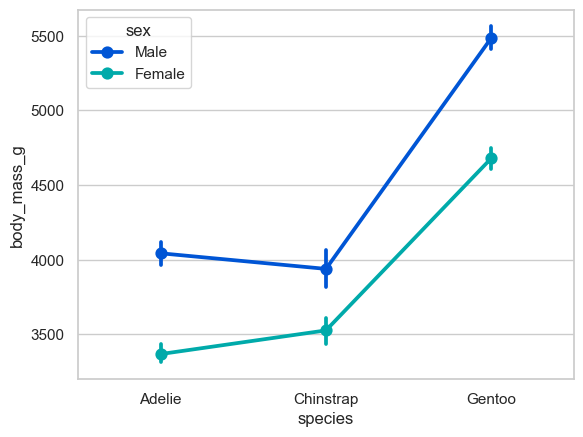

In [14]:
# penguin 데이터에 pointplot을 출력합니다.
sns.pointplot(data=penguins, 
              x='species',
              y='body_mass_g',
              hue='sex',
              palette='winter')

In [ ]:
sns.pointplot

### 3. 크기 표현하기

### Histplot 

- 가장 기본적으로 사용되는 히스토그램을 출력하는 plot.


- 전체 데이터를 특정 구간별 정보를 확인할 때 사용합니다.

<Axes: xlabel='bill_depth_mm', ylabel='Count'>

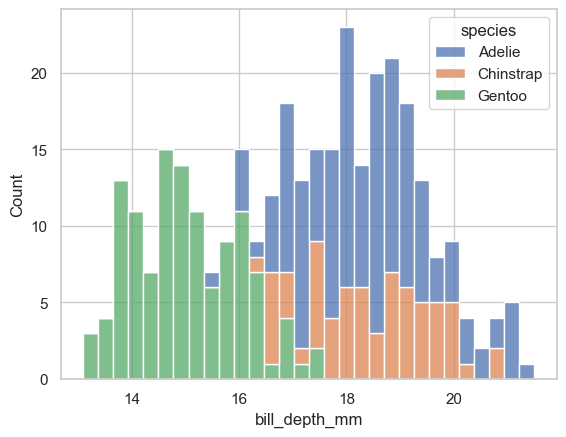

In [38]:
# penguin 데이터에 histplot을 출력합니다.
sns.histplot(data=penguins,
            x="bill_depth_mm",
            bins=30,
            hue='species',
            multiple='stack')

### Barplot

- 어떤 데이터에 대한 값의 크기를 막대로 보여주는 plot. (a.k.a. 막대그래프)


- 가로 / 세로 두 가지로 모두 출력 가능합니다.


- 히스토그램과는 다릅니다!

In [39]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


<Axes: xlabel='island', ylabel='bill_depth_mm'>

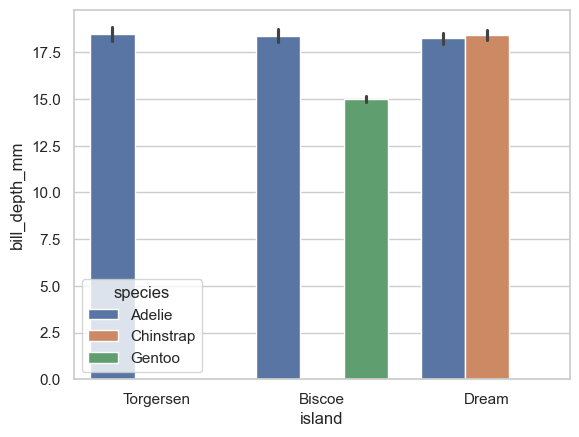

In [42]:
# penguin 데이터에 barplot을 출력합니다.
sns.barplot(data=penguins,
            x="island",
            y="bill_depth_mm",
            hue='species',)

### Countplot

- 범주형 속성을 가지는 데이터들의 histogram을 보여주는 plot.



- 종류별 count를 보여주는 방법입니다.

<Axes: xlabel='island', ylabel='count'>

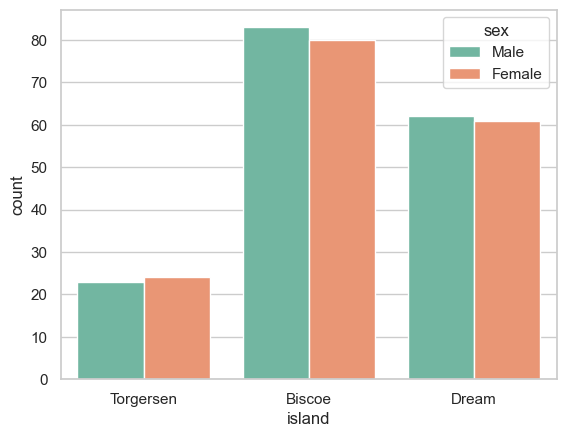

In [43]:
# penguin 데이터에 countplot을 출력합니다.
sns.countplot(data=penguins,
              x='island',
              hue='sex',
             palette='Set2')

### 4. 분포 표현하기

### Boxplot


- 데이터의 각 종류별로 사분위 수(quantile)를 표시하는 plot.


- 특정 데이터의 전체적인 분포를 확인하기 좋은 시각화 기법입니다.


- box와 전체 range의 그림을 통해 outlier를 찾기 쉽습니다. (IQR : Inter-Quantile Range)

<Axes: xlabel='species', ylabel='body_mass_g'>

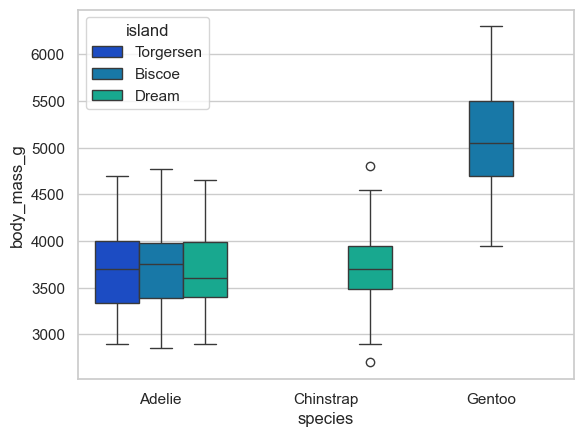

In [48]:
# penguin 데이터에 boxplot을 출력합니다.
sns.boxplot(data=penguins,
            x="species",
            y="body_mass_g",
           palette="winter",
           hue='island')

### swarmplot 

- 데이터에 대한 분포 자체를 보여주는 plot.


- boxplot과 비슷하지만, 전체 분포에 대한 그림을 보여준다는 점에서 boxplot과 다릅니다.


- 보통 boxplot과 함께 표시하면, 평균 근처에 데이터가 얼마나 있는지(boxplot) 전체적으로 어떻게 퍼져있는지(swarmplot) 모두 확인이 가능합니다.

<Axes: xlabel='sex', ylabel='flipper_length_mm'>

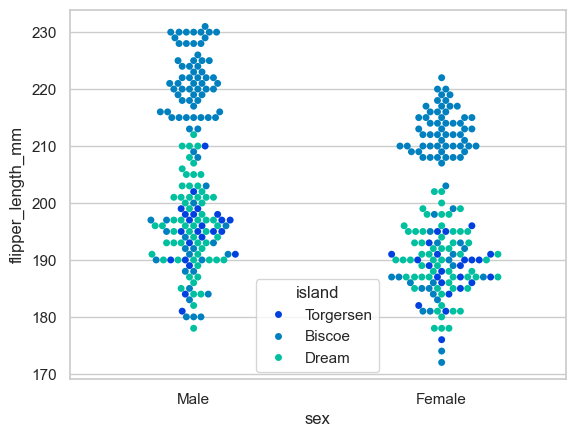

In [50]:
# penguin 데이터에 swarmplot을 출력합니다.
sns.swarmplot(data=penguins,
              x='sex',
              y='flipper_length_mm',
             palette='winter',
             hue='island')

### Scatterplot

- lineplot과 비슷하게 x, y에 대한 전체적인 분포를 확인하는 plot.


- lineplot은 경향성에 초점을 둔다면, scatterplot은 데이터 그 자체가 퍼져있는 모양에 중점을 둡니다.

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

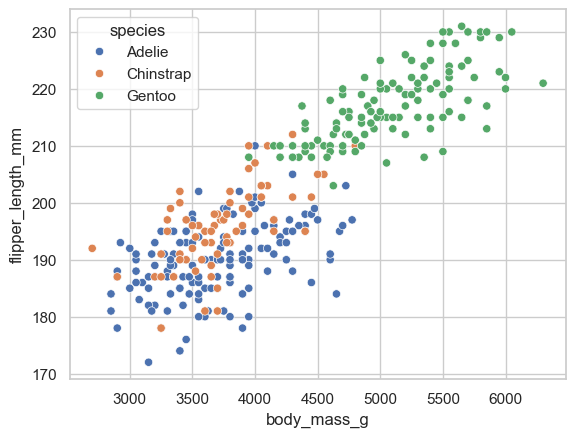

In [52]:
# penguin 데이터에 scatterplot을 출력합니다.
sns.scatterplot(data=penguins,
                x='body_mass_g',
                y='flipper_length_mm',
               hue='species')

### 5. 연관성 표현하기

### Heatmap

- 정사각형 그림에 데이터에 대한 정도 차이를 색 차이로 보여주는 plot.


- 말 그대로 heatmap이기 때문에, 열화상카메라로 사물을 찍은 것처럼 정보의 차이를 보여줍니다.


- pairplot과 비슷하게 feature간 관계를 시각화할 때 많이 사용합니다.

In [57]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [62]:
# 각 column간 상관관계를 파악하기 위해 Correlation matrix를 만듭니다.
penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<Axes: >

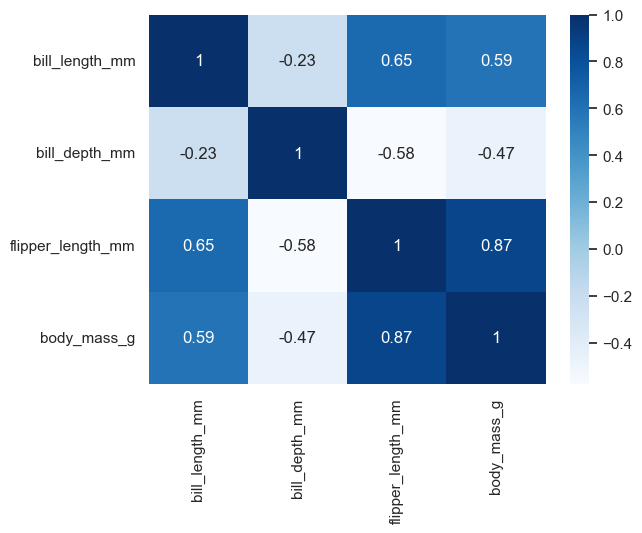

In [66]:
# penguin 데이터에 heatmap을 출력합니다.
sns.heatmap(data=penguins[['bill_length_mm', 
                      'bill_depth_mm', 
                      'flipper_length_mm', 
                      'body_mass_g']].corr(),
           annot=True,
           cmap='Blues')

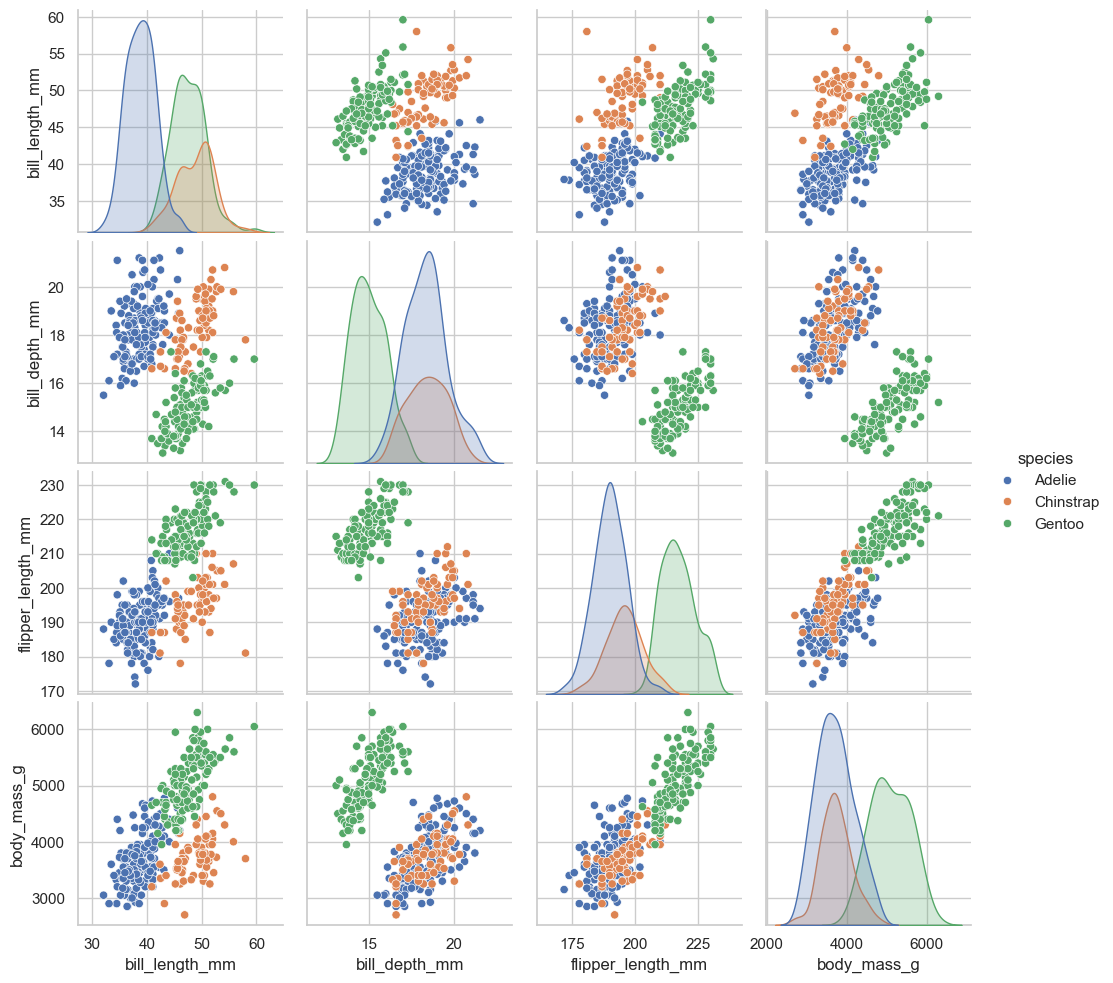

In [68]:
sns.pairplot(data=penguins,
            hue='species')